<h1>PYBER ANALYSIS</h1>
<ul>
<li>Urban cities have the highest number of rides. This makes sense when you consider more population equals more opportunities. However, it also has the lowest average fare. This could be due to more competition and/or shorter, more frequent rides. More information is needed to know for sure.
    
<li>It would be worth looking into urban and suburban cities with low driver count to see if increasing drivers results in more rides and therefore more revenue.
    
<li>Average rural fares were pretty spread out. This is likely due to varying city sizes and traveling distances.
</ul>

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Create dataframes by city type
urban = pyber_df.loc[(pyber_df["type"] == "Urban")]
suburban = pyber_df.loc[(pyber_df["type"] == "Suburban")]
rural = pyber_df.loc[(pyber_df["type"] == "Rural")]
#urban
#suburban
#rural

In [3]:
# Create totals for each city type
#Urban Totals
avg_fare_urban_gb = urban.groupby(["city"])["fare"].mean()
total_rides_urban_gb = urban.groupby(["city"]).count()["ride_id"]
total_drivers_urban_gb = urban.groupby(["city"])["driver_count"].mean()

# Suburban Totals
avg_fare_suburban_gb = suburban.groupby(["city"])["fare"].mean()
total_rides_suburban_gb = suburban.groupby(["city"]).count()["ride_id"]
total_drivers_suburban_gb = suburban.groupby(["city"])["driver_count"].mean()

# Rural Totals
avg_fare_rural_gb = rural.groupby(["city"])["fare"].mean()
total_rides_rural_gb = rural.groupby(["city"]).count()["ride_id"]
total_drivers_rural_gb = rural.groupby(["city"])["driver_count"].mean()

#avg_fare_urban_gb
#total_rides_urban_gb
#total_drivers_urban_gb

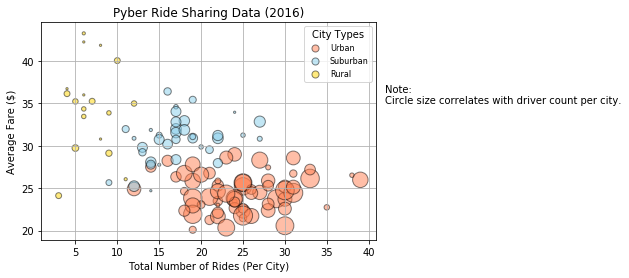

In [4]:
# Build the scatter plots for each city types
plt.scatter(total_rides_urban_gb, avg_fare_urban_gb,s=total_drivers_urban_gb*5,
            marker ="o", facecolors ="coral", edgecolors="black", alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_gb, avg_fare_suburban_gb,s=total_drivers_suburban_gb*5,
            marker ="o", facecolors ="skyblue", edgecolors="black", alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_gb, avg_fare_rural_gb,s=total_drivers_rural_gb*5,
            marker ="o", facecolors ="gold", edgecolors="black", alpha = 0.5, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
# https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("PyberAvgPerRide.png")

# Show plot
plt.show()

## Total Fares by City Type

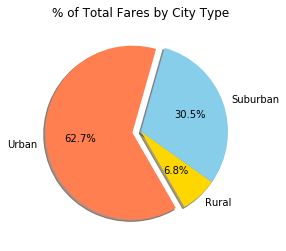

In [5]:
# Calculate Type Percents
city_type_gb = pyber_df.groupby(['type'])
fare_sum = city_type_gb['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("FaresByType.png")

# Show Figure
plt.show()

## Total Rides by City Type

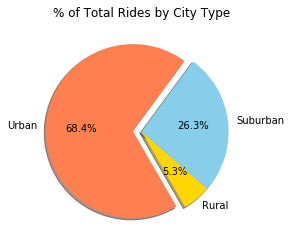

In [6]:
ride_count = city_type_gb['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("RidesByType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

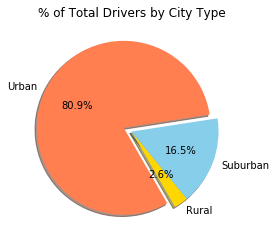

In [7]:
# Calculate Driver Percents
drivers_gb = city_data.groupby(['type'])
drivers_sum = drivers_gb['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "skyblue", "coral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DriversByType.png")

# Show Figure
plt.show()